# Applying the Data Analysis Method to a Research Problem

Github link :https://github.com/nothing2c/Data-Analytics/tree/master/Data%20Analytics%20CA%20VG%20Metacritic%20Scores
(need Git LFS to download CSVs properly, if this doesn't work link to datasets on kaggle is in the references)

# 1. Determine Research Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>

## 1.1. A Game Companys Effect On Their Games Metacritic <a class="anchor" id="Title"></a>

## 1.2. Introduction <a class="anchor" id="Introduction"></a> 

The aim of this project is to discover whether or not users have a bias towards certain game developers, publishers and series.

The first dataset i'm using contains review scores for the top 5000 gmaes released between 1998 and 2018. The second dataset i'm using contains individual user reviews with their respective scores and comments.

The only past studies i could find on this topic are from eludamos: Journal for Computer Game Culture, where they compare games metacritic scores to the number of sales. Other than that, the only real starting point i have is based off of forum threads i've read complaining about paticular game companies and how they say they're going to boycot the company as a whole. On the other hand certain companies have a reputation of having a very devouted fanbase that like any game they put out regardless of the games flaws.

Some relevant issues that might affect statistics are whether the company is notorious for releasing games with undesirable features such as always-on DRM or 'Loot Boxes'

This is an important problem as some games can contain egregious 'Micro-transactions' which, while very profitable for the company, are often implemented in a way that has a negative impact on the base game. I am conducting this research to try and find if companies that are notorious for implementing systems like these have a lower user review score for their games, even for their games that dont implement these features.

The initial way im going to determine this is to compare the average user score to the average score of the official reviewers. Afterwards,for each game for a specific publisher a user has reviewed, i will compare their score to the average user score for that game. I will use this data to determine whether they tend to give lower or higher scores based on the publisher.

This will not be a way of finding out whether a game will suceed or not, but stakeholders frequently look at metacritic scores of a companys games as a way of deciding whether they want to invest or not.

## 1.3.Terminology and Key Words<a class="anchor" id="Terminology"></a>

- Micro-Transaction: Additional content that can be purchased for the game, priced between €1 - €20.
- Loot-Box: Additional content that can be purchased whos contents are of random value, akin to gambling.
- always-on DRM: form of DRM that requires a consumer to remain connected to a server, especially through an internet  connection, in order to play the game
- Reviewer: Refers to the reviewers who are Game Journalists (Metascore in GameInfo dataset)
- User: Refers to the user reviews (Avg_Userscore in GameInfo dataset & Userscore in Comments dataset) 

## 1.2.Background <a class="anchor" id="Background"></a>

A book that has done research on this topic before is eludamos: Journal for Computer Game Culture. In this book, there is a study comparing games metacritic score to the number of sales they achieved. While this doesnt directly assist my research, its conclusion was that games with a higher score generally sold better shows that it is in a companys best interest to atain a high metascore for their games. So it is in a companys best interest to try and stay on the good side of customers too try and maintain a high metascore.

Some companies that have a bad reputation are EA, Activision and Take-Two interactive (owns 2K and RockstarNorth) have a bad relationship with their customers. These companies also partake in some practices that can skew my data. For example, Activisions subsidiaries Infinity Ward and Treyarch have a history of releasing their games normally, wait until all the reviews have come in, and then implement consumer unfreindly features such as loot boxes. With practices like this, there is a possibility that some people have grown to dislike the the company that create or publish the game and this may influence their review of the game.

An example of how a publisher behind a game can leave a negative impact is for the release trailer for Sekiro: Shadows Die Twice at E3 2018. The developer, From Software have a good reputation for creating good games that dont try to exploit the consumer. When their logo appeared in the trailer, there was audible excitement from the crowd. However, when the publisher appeared on the screen showed afterwards, all the cheering stopped and turned to concern. Many people who would have initially bought this game just because From Software devolped it were now on the fence just bucause Activision published it.

On the other side of the spectrum is Nintendo who have a reputation of having a very dedicated fanbase. For example, when Gamefreak, a subsiduary of Nintendo, release a new Pokemon game, they always release two versions of the game with minimal differences between them. Some people see this as an exploitive practice to make more money, but for some extreme fans they see this as just more Pokemon games to buy.

With examples like these, i wish to see if the reputation these companies have accrued have affected the metacritic score for their games in any significant way.

 ## 1.3 Research Question <a class="anchor" id="Research Question"></a>

Question: Is There a Bias Towards Certain Game Developers.

People often complain about the pratices certain game developers artake in, and some people will love a game no matter its flaws just beacuse it was made by Nintendo. This project aims to prove wether these claims are true or not.

 ## 1.4 Methodology/Methods <a class="anchor" id="Methodology/Methods"></a>

The method i chose to carry out this study was sentimental analysis. The reason i chose this was to try and find common words used in negative reviews to try and prove whether there is a collective bias towards a game. As i could not find any previous work similar to mine, i had to follow a more generic tutorial to acomplish this. The tutorial i followed was 'Basic Sentiment Analysis using NLTK' by Smaria Munir. In order to use sentimental analysis on my data, i will need to use the python library NLTK. This will alow me to create a 'bag of words' from the comments in the dataset. I will then be able to use Vader sentiment analysis to determine which comments are negative. Finally I will compare the most common words from the bag of words to the negative reviews to see how frequently they appear. 

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>

In [39]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [40]:
# Data source: 
# Source Query location: 
pathInfo = 'metacritic_game_info.csv'
pathComments = 'metacritic_game_user_comments.csv'

# Reads the data from the file - denotes as CSV
dfInfo =  pd.read_csv(pathInfo) 
dfComments = pd.read_csv(pathComments)

# Display datasets
display(dfInfo)
display(dfComments)

Unnamed: 0                                 Title  Year  \
0              0  The Legend of Zelda: Ocarina of Time  1998   
1              1              Tony Hawk's Pro Skater 2  2000   
2              2                   Grand Theft Auto IV  2008   
3              3                           SoulCalibur  1999   
4              4                   Grand Theft Auto IV  2008   
...          ...                                   ...   ...   
4995        4995                          Donut County  2018   
4996        4996                MotorStorm: Apocalypse  2011   
4997        4997                          The Last Guy  2008   
4998        4998         Valiant Hearts: The Great War  2014   
4999        4999                         Mothergunship  2018   

                   Publisher  \
0                   Nintendo   
1     NeversoftEntertainment   
2              RockstarNorth   
3                      Namco   
4              RockstarNorth   
...                      ...   
4995             BenEsposito   
4996        EvolutionStudios   
4997          SCEJapanStudio   
4998      UbisoftMontpellier   
4999             GripDigital   

                                                  Genre      Platform  \
0                              Action Adventure;Fantasy    Nintendo64   
1                      Sports;Alternative;Skateboarding   PlayStation   
2             Action Adventure;Modern;Modern;Open-World  PlayStation3   
3                                    Action;Fighting;3D     Dreamcast   
4             Action Adventure;Modern;Modern;Open-World       Xbox360   
...                                                 ...           ...   
4995                           Action Adventure;General            PC   
4996  Driving;Racing;Simulation;Rally / Offroad;Rall...  PlayStation3   
4997             Action Adventure;Sci-Fi;Sci-Fi;General  PlayStation3   
4998                 Platformer;2D;Action;Platformer;2D  PlayStation4   
4999                                     Action;General       XboxOne   

     Metascore Avg_Userscore             No_Players  
0           99           9.1               1 Player  
1           98           7.4                   1-2   
2           98           7.5               1 Player  
3           98           8.6                   1-2   
4           98           7.9               1 Player  
...        ...           ...                    ...  
4995        77           8.1  No Online Multiplayer  
4996        77           7.7              4  Online  
4997        77           6.8               1 Player  
4998        77           8.4          not specified  
4999        77           7.2     Online Multiplayer  

[5000 rows x 9 columns]

Unnamed: 0                                       Title    Platform  \
0                0        The Legend of Zelda: Ocarina of Time  Nintendo64   
1                1        The Legend of Zelda: Ocarina of Time  Nintendo64   
2                2        The Legend of Zelda: Ocarina of Time  Nintendo64   
3                3        The Legend of Zelda: Ocarina of Time  Nintendo64   
4                4        The Legend of Zelda: Ocarina of Time  Nintendo64   
...            ...                                         ...         ...   
283978      283978  Etrian Odyssey Untold: The Millennium Girl         3DS   
283979      283979  Etrian Odyssey Untold: The Millennium Girl         3DS   
283980      283980  Etrian Odyssey Untold: The Millennium Girl         3DS   
283981      283981  Etrian Odyssey Untold: The Millennium Girl         3DS   
283982      283982  Etrian Odyssey Untold: The Millennium Girl         3DS   

        Userscore                                            Comment  \
0              10  Everything in OoT is so near at perfection, it...   
1              10  I won't bore you with what everyone is already...   
2              10  Anyone who gives the masterpiece below a 7 or ...   
3              10  I'm one of those people who think that this is...   
4              10   This game is the highest rated game on Metacr...   
...           ...                                                ...   
283978          7  Extremely similar to EO:4, which obviously isn...   
283979          0  Typical overrated Atlus trash. A game i should...   
283980          9  While I find the story mode to have annoying c...   
283981          8  Pretty good, but it certainly lacks the visual...   
283982          9  As my first game from the "Etrian series" i ha...   

             Username  
0          SirCaestus  
1            Kaistlin  
2              Jacody  
3          doodlerman  
4             StevenA  
...               ...  
283978  RileyWRussell  
283979      TemplarGR  
283980        midipon  
283981         night4  
283982        Balorer  

[283983 rows x 6 columns]

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>

In [41]:
print("---Game Info Columns---\n" + str(dfInfo.columns) + "\n")
print("---Review Comments Columns---\n" + str(dfComments.columns))

---Game Info Columns---
Index(['Unnamed: 0', 'Title', 'Year', 'Publisher', 'Genre', 'Platform',
       'Metascore', 'Avg_Userscore', 'No_Players'],
      dtype='object')

---Review Comments Columns---
Index(['Unnamed: 0', 'Title', 'Platform', 'Userscore', 'Comment', 'Username'], dtype='object')


In [42]:
print("---Game Info Shape---\n" + str(dfInfo.shape) + "\n")
print("---Review Comments Shape---\n" + str(dfComments.shape))

---Game Info Shape---
(5000, 9)

---Review Comments Shape---
(283983, 6)


In [43]:
print("---Game Info Column Data Types---\n" + str(dfInfo.dtypes) + "\n")
print("---Review Comments Column Data Types---\n" + str(dfComments.dtypes))

---Game Info Column Data Types---
Unnamed: 0        int64
Title            object
Year             object
Publisher        object
Genre            object
Platform         object
Metascore        object
Avg_Userscore    object
No_Players       object
dtype: object

---Review Comments Column Data Types---
Unnamed: 0     int64
Title         object
Platform      object
Userscore      int64
Comment       object
Username      object
dtype: object


In [44]:
print("---Game Info Description---\n" + str(dfInfo.describe(include = 'all')) + "\n")
print("---Review Comments Description---\n" + str(dfComments.describe(include = 'all')))

# Need to convert 'Metascore' and 'Avg_Userscore' data type in Game Info dataset to floats

---Game Info Description---
         Unnamed: 0          Title  Year Publisher                 Genre  \
count   5000.000000           5000  5000      5000                  5000   
unique          NaN           3438    25      1238                   927   
top             NaN  Madden NFL 07  2017    Capcom  Action;Platformer;2D   
freq            NaN              7   363       131                   142   
mean    2499.500000            NaN   NaN       NaN                   NaN   
std     1443.520003            NaN   NaN       NaN                   NaN   
min        0.000000            NaN   NaN       NaN                   NaN   
25%     1249.750000            NaN   NaN       NaN                   NaN   
50%     2499.500000            NaN   NaN       NaN                   NaN   
75%     3749.250000            NaN   NaN       NaN                   NaN   
max     4999.000000            NaN   NaN       NaN                   NaN   

       Platform Metascore Avg_Userscore     No_Players  
co

In [45]:
print("---Game Info Information---\n" + str(dfInfo.info()) + "\n")
print("---Review Comments Information---\n" + str(dfComments.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
Unnamed: 0       5000 non-null int64
Title            5000 non-null object
Year             5000 non-null object
Publisher        5000 non-null object
Genre            5000 non-null object
Platform         5000 non-null object
Metascore        5000 non-null object
Avg_Userscore    5000 non-null object
No_Players       4993 non-null object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB
---Game Info Information---
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283983 entries, 0 to 283982
Data columns (total 6 columns):
Unnamed: 0    283983 non-null int64
Title         283983 non-null object
Platform      283983 non-null object
Userscore     283983 non-null int64
Comment       283960 non-null object
Username      283980 non-null object
dtypes: int64(2), object(4)
memory usage: 13.0+ MB
---Review Comments Information---
None


In [46]:
print("---Game Info First 10 Rows---")
display(dfInfo.head(10))

print("---Review Comments First 10 Rows---")
display(dfComments.head(10))

---Game Info First 10 Rows---


Unnamed: 0                                 Title  Year  \
0           0  The Legend of Zelda: Ocarina of Time  1998   
1           1              Tony Hawk's Pro Skater 2  2000   
2           2                   Grand Theft Auto IV  2008   
3           3                           SoulCalibur  1999   
4           4                   Grand Theft Auto IV  2008   
5           5                    Super Mario Galaxy  2007   
6           6                  Super Mario Galaxy 2  2010   
7           7                    Grand Theft Auto V  2014   
8           8                    Grand Theft Auto V  2013   
9           9                    Grand Theft Auto V  2013   

                Publisher                                      Genre  \
0                Nintendo                   Action Adventure;Fantasy   
1  NeversoftEntertainment           Sports;Alternative;Skateboarding   
2           RockstarNorth  Action Adventure;Modern;Modern;Open-World   
3                   Namco                         Action;Fighting;3D   
4           RockstarNorth  Action Adventure;Modern;Modern;Open-World   
5                Nintendo         Action;Platformer;Platformer;3D;3D   
6        NintendoEADTokyo         Action;Platformer;Platformer;3D;3D   
7           RockstarNorth         Action Adventure;Modern;Open-World   
8           RockstarNorth  Modern;Action Adventure;Modern;Open-World   
9           RockstarNorth  Modern;Action Adventure;Modern;Open-World   

       Platform Metascore Avg_Userscore             No_Players  
0    Nintendo64        99           9.1               1 Player  
1   PlayStation        98           7.4                   1-2   
2  PlayStation3        98           7.5               1 Player  
3     Dreamcast        98           8.6                   1-2   
4       Xbox360        98           7.9               1 Player  
5           Wii        97           9.0  No Online Multiplayer  
6           Wii        97           9.1  No Online Multiplayer  
7       XboxOne        97           7.8              Up to 30   
8  PlayStation3        97           8.3              Up to 16   
9       Xbox360        97           8.3              Up to 16

---Review Comments First 10 Rows---


Unnamed: 0                                 Title    Platform  Userscore  \
0           0  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
1           1  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
2           2  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
3           3  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
4           4  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
5           5  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
6           6  The Legend of Zelda: Ocarina of Time  Nintendo64          9   
7           7  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
8           8  The Legend of Zelda: Ocarina of Time  Nintendo64         10   
9           9  The Legend of Zelda: Ocarina of Time  Nintendo64         10   

                                             Comment         Username  
0  Everything in OoT is so near at perfection, it...       SirCaestus  
1  I won't bore you with what everyone is already...         Kaistlin  
2  Anyone who gives the masterpiece below a 7 or ...           Jacody  
3  I'm one of those people who think that this is...       doodlerman  
4   This game is the highest rated game on Metacr...          StevenA  
5  I think it's funny that you have Zelda haters ...         joei1382  
6  I played A Link To The Past so many times in m...           Corvix  
7  The Legend of Zelda: Ocarina of Time is withou...  pittsburghboy91  
8              This review contains spoilers, cli...        Nosidda89  
9  I'm not kidding when I say that this is the on...   Regeneration13

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>

In [47]:
print("---Game Info Number Of Rows With Null Values---\n" + str(dfInfo.isnull().sum()) + "\n")
print("---Review Comments Number Of Rows With Null Values---\n" + str(dfComments.isnull().sum()))

---Game Info Number Of Rows With Null Values---
Unnamed: 0       0
Title            0
Year             0
Publisher        0
Genre            0
Platform         0
Metascore        0
Avg_Userscore    0
No_Players       7
dtype: int64

---Review Comments Number Of Rows With Null Values---
Unnamed: 0     0
Title          0
Platform       0
Userscore      0
Comment       23
Username       3
dtype: int64


In [48]:
# No_Players in dfInfo is irrelevant and the entire column will be dropped later

print("---Review Comments Shape---\n" + str(dfComments.shape) + "\n")

dfComments = dfComments.dropna()

print("---Review Comments Number Of Rows With Null Values---\n" + str(dfComments.isnull().sum()))

---Review Comments Shape---
(283983, 6)

---Review Comments Number Of Rows With Null Values---
Unnamed: 0    0
Title         0
Platform      0
Userscore     0
Comment       0
Username      0
dtype: int64


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

In [49]:
# Convert object columns 'Metascore' and 'Avg_Userscore' floats

# Drop incorrect values for 'Metascore' and 'Avg_Userscore'
dfInfo.drop(dfInfo.loc[dfInfo['Metascore'] == 'not specified'].index, inplace=True)
dfInfo.drop(dfInfo.loc[dfInfo['Avg_Userscore'] == 'not specified'].index, inplace=True)
dfInfo.drop(dfInfo.loc[dfInfo['Avg_Userscore'] == 'tbd'].index, inplace=True)

# Convert types
dfInfo['Metascore'] = dfInfo['Metascore'].astype(np.float64)
dfInfo['Avg_Userscore'] = dfInfo['Avg_Userscore'].astype(np.float64)

print("---Game Info Column Data Types---\n" + str(dfInfo.dtypes))

---Game Info Column Data Types---
Unnamed: 0         int64
Title             object
Year              object
Publisher         object
Genre             object
Platform          object
Metascore        float64
Avg_Userscore    float64
No_Players        object
dtype: object


In [50]:
# Search for invalid values in columns

# Check to insure all review scores are in a valid range
print(dfInfo[dfInfo["Metascore"] > 100])
print(dfInfo[dfInfo["Metascore"] < 0])

print(dfInfo[dfInfo["Avg_Userscore"] > 10])
print(dfInfo[dfInfo["Avg_Userscore"] < 0])

print(dfComments[dfComments["Userscore"] > 10])
print(dfComments[dfComments["Userscore"] < 0])

# All value in valid range, no further action required

Empty DataFrame
Columns: [Unnamed: 0, Title, Year, Publisher, Genre, Platform, Metascore, Avg_Userscore, No_Players]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Title, Year, Publisher, Genre, Platform, Metascore, Avg_Userscore, No_Players]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Title, Year, Publisher, Genre, Platform, Metascore, Avg_Userscore, No_Players]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Title, Year, Publisher, Genre, Platform, Metascore, Avg_Userscore, No_Players]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Title, Platform, Userscore, Comment, Username]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, Title, Platform, Userscore, Comment, Username]
Index: []


In [51]:
# Divide the 'Metascore' by 10 so it can be compared to the 'Avg_Userscore'

# if statement makes sure it doesnt divide multiple times on multiple runs
if(dfInfo["Metascore"].iloc[0] > 10):
    dfInfo["Metascore"] = dfInfo["Metascore"] / 10

dfInfo.head(10)

Unnamed: 0                                 Title  Year  \
0           0  The Legend of Zelda: Ocarina of Time  1998   
1           1              Tony Hawk's Pro Skater 2  2000   
2           2                   Grand Theft Auto IV  2008   
3           3                           SoulCalibur  1999   
4           4                   Grand Theft Auto IV  2008   
5           5                    Super Mario Galaxy  2007   
6           6                  Super Mario Galaxy 2  2010   
7           7                    Grand Theft Auto V  2014   
8           8                    Grand Theft Auto V  2013   
9           9                    Grand Theft Auto V  2013   

                Publisher                                      Genre  \
0                Nintendo                   Action Adventure;Fantasy   
1  NeversoftEntertainment           Sports;Alternative;Skateboarding   
2           RockstarNorth  Action Adventure;Modern;Modern;Open-World   
3                   Namco                         Action;Fighting;3D   
4           RockstarNorth  Action Adventure;Modern;Modern;Open-World   
5                Nintendo         Action;Platformer;Platformer;3D;3D   
6        NintendoEADTokyo         Action;Platformer;Platformer;3D;3D   
7           RockstarNorth         Action Adventure;Modern;Open-World   
8           RockstarNorth  Modern;Action Adventure;Modern;Open-World   
9           RockstarNorth  Modern;Action Adventure;Modern;Open-World   

       Platform  Metascore  Avg_Userscore             No_Players  
0    Nintendo64        9.9            9.1               1 Player  
1   PlayStation        9.8            7.4                   1-2   
2  PlayStation3        9.8            7.5               1 Player  
3     Dreamcast        9.8            8.6                   1-2   
4       Xbox360        9.8            7.9               1 Player  
5           Wii        9.7            9.0  No Online Multiplayer  
6           Wii        9.7            9.1  No Online Multiplayer  
7       XboxOne        9.7            7.8              Up to 30   
8  PlayStation3        9.7            8.3              Up to 16   
9       Xbox360        9.7            8.3              Up to 16

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

Pie chart detailing the userscores for each user review:

<function matplotlib.pyplot.show(*args, **kw)>

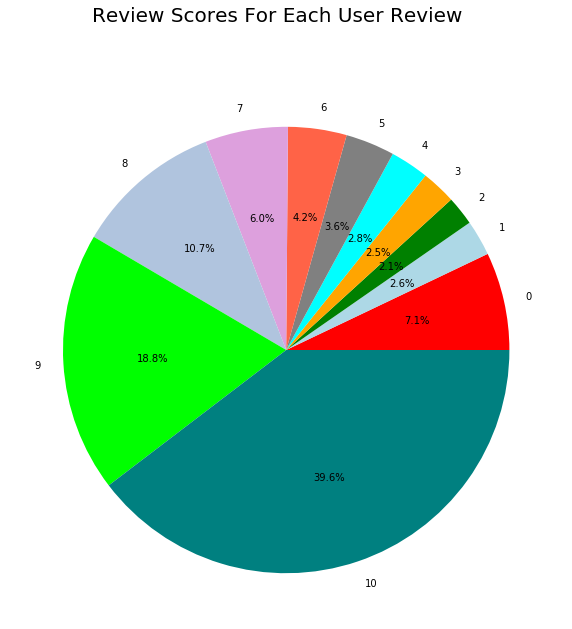

In [52]:
# Variable used for pie chart
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colors = ["red", "lightblue", "green", "orange", "cyan", "grey", "tomato", "plum", "lightsteelblue", "lime", "teal"]
data = dict(dfComments.Userscore.value_counts())
sizes = [data[0], data[1], data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10]]

plt.axis("equal")

# Increase size of pie chart for easier viewing
fig = plt.gcf()
fig.set_size_inches(10,10)
fig.suptitle("Review Scores For Each User Review", fontsize = 20)

# Create pie chart with pre-defined variables
plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%")

# Show pie chart
plt.show

As the dataset contains the top 5000 games between 1998 and 2018, it is expexcted that their would be more positive reviews. However, considering that these are objectively good games, the number of 0 / 10 reviews shows that their may be some bias towards either the game, publisher or some other factor.

Scatter diagram detailing the relationship between each games Metascore and its Avg_Userscore:

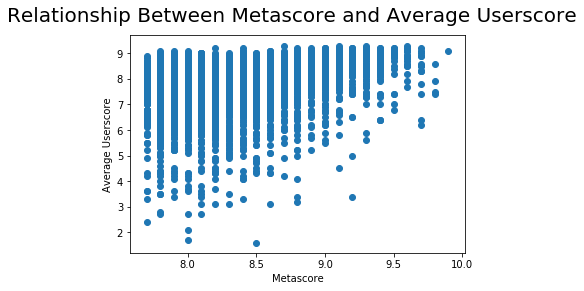

In [53]:
fig = plt.figure()
fig.suptitle("Relationship Between Metascore and Average Userscore", fontsize = 20)
plt.xlabel("Metascore", fontsize = 10)
plt.ylabel("Average Userscore", fontsize = 10)
plt.scatter(dfInfo["Metascore"], dfInfo["Avg_Userscore"])
plt.show()

As we can se from this graph, most games generally have a small difference between their Metascore and their Average Userscore. However their seem to be some games with a fairly sizeable difference between these scores i.e. one game has a metascore of 8 but an average usersore of less than 2. These are the games that i wil be focusing on.

Next, I will create a new dataset containing all the games where their Metascore and their Average Userscore differ by at least 3.

In [54]:
# Dataset containing the list of games that have a difference of 3 or more between the Metascore and Average Userscore

dfDifference = dfInfo[(dfInfo["Metascore"] - dfInfo["Avg_Userscore"] >= 3)]
dfDifference

Unnamed: 0                                Title  Year  \
10            10             Tony Hawk's Pro Skater 2  2000   
19            19                              NFL 2K1  2000   
64            64       Call of Duty: Modern Warfare 2  2009   
89            89                              Celeste  2018   
98            98       Call of Duty: Modern Warfare 2  2009   
...          ...                                  ...   ...   
4875        4875                      The Inner World  2017   
4913        4913                     Street Fighter V  2016   
4917        4917                          Angry Birds  2011   
4968        4968  Baldur's Gate: Siege of Dragonspear  2016   
4986        4986                       Little Red Lie  2018   

                                            Publisher  \
10                                           Treyarch   
19                                     VisualConcepts   
64                                       InfinityWard   
89                                 MattMakesGamesInc.   
98                                       InfinityWard   
...                                               ...   
4875                                      HeadupGames   
4913                                           Capcom   
4917  RovioMobile,AbstractionGames,RovioEntertainment   
4968                                    OverhaulGames   
4986                                            WZOGI   

                                                  Genre      Platform  \
10                     Sports;Alternative;Skateboarding     Dreamcast   
19                      Sports;Traditional;Football;Sim     Dreamcast   
64    Action;Shooter;Shooter;First-Person;Modern;Mod...  PlayStation3   
89                                 Action;Platformer;2D       XboxOne   
98    Action;Shooter;Shooter;First-Person;Modern;Mod...       Xbox360   
...                                                 ...           ...   
4875                  Adventure;General;Point-and-Click       XboxOne   
4913                                 Action;Fighting;2D  PlayStation4   
4917  Strategy;Miscellaneous;Puzzle;Action;General;G...           PSP   
4968                         Role-Playing;Western-Style            PC   
4986                                  Adventure;General  PlayStation4   

      Metascore  Avg_Userscore             No_Players  
10          9.7            6.2          not specified  
19          9.7            6.4          not specified  
64          9.4            6.4              Up to 18   
89          9.4            6.4  No Online Multiplayer  
98          9.4            6.4              Up to 18   
...         ...            ...                    ...  
4875        7.7            2.4          not specified  
4913        7.7            3.6                     2   
4917        7.7            3.3               1 Player  
4968        7.7            3.6          not specified  
4986        7.7            4.2          not specified  

[129 rows x 9 columns]

Barchart showing the number of games for each publisher in the dfDfference dataset:

<function matplotlib.pyplot.show(*args, **kw)>

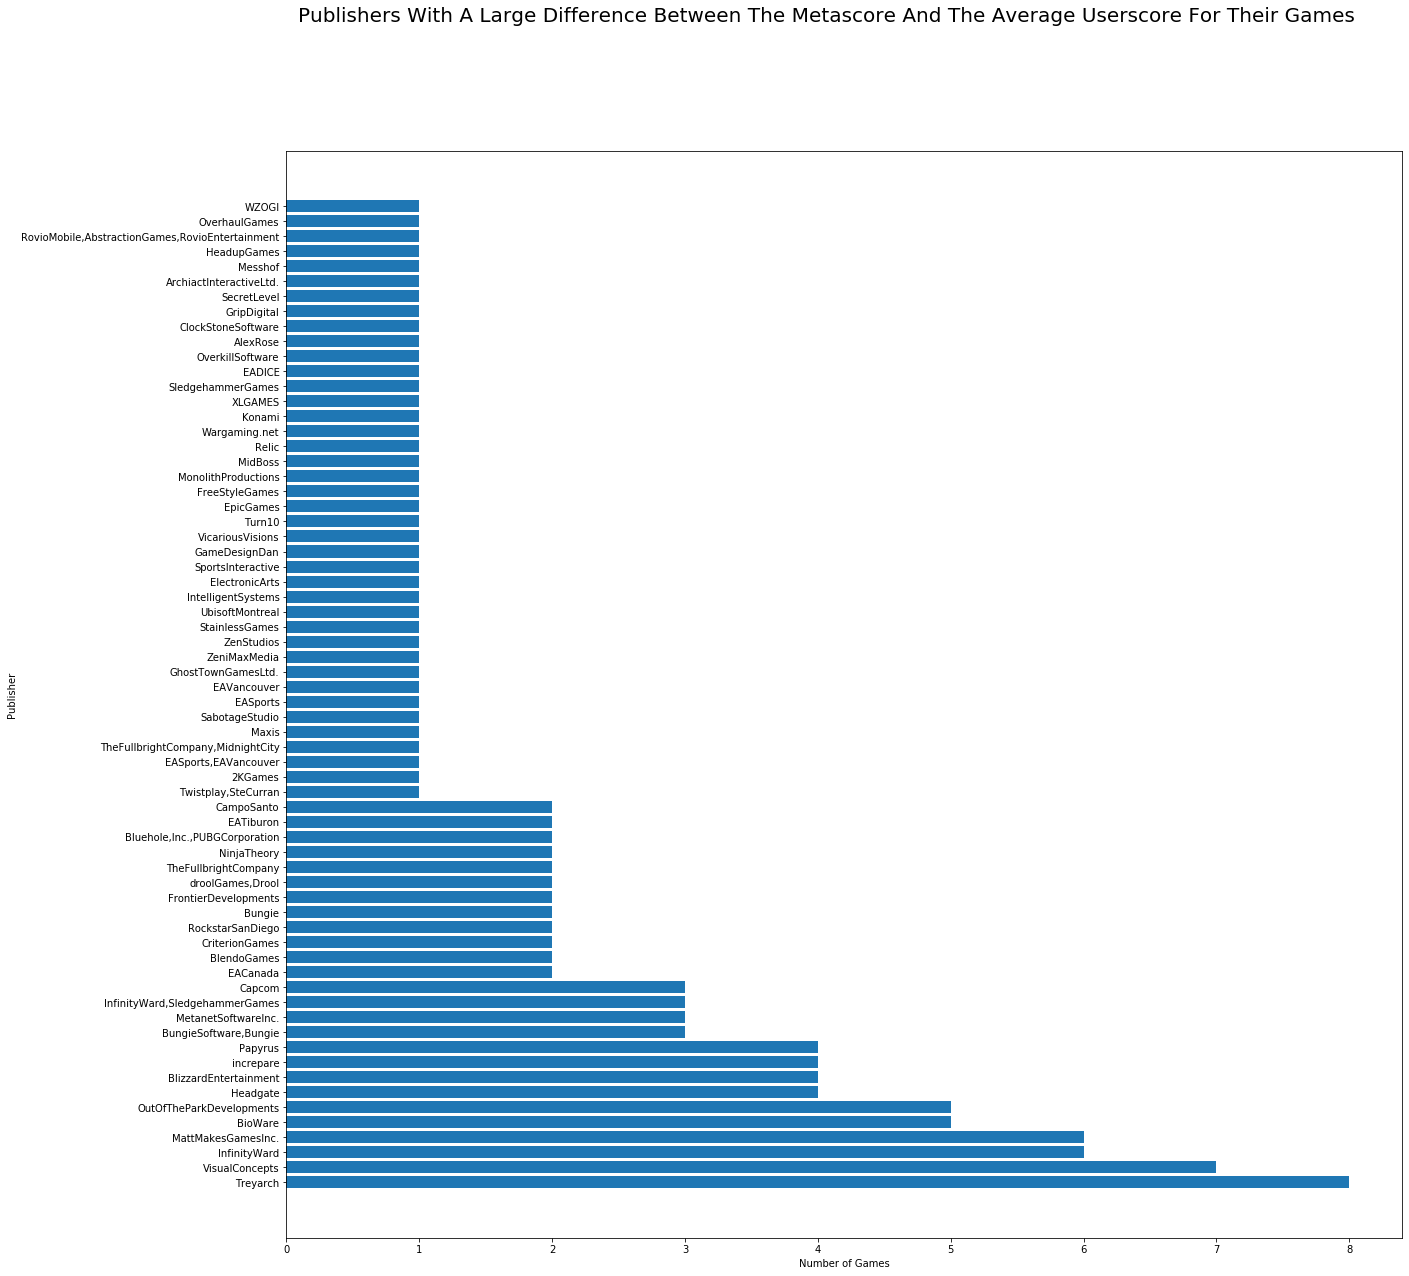

In [55]:
# Variable used for pie chart
labels = dfDifference["Publisher"].unique()
#data = dict(dfComments.Userscore.value_counts())

# Increase size of pie chart for easier viewing
fig = plt.gcf()
fig.set_size_inches(20,20)
fig.suptitle("Publishers With A Large Difference Between The Metascore And The Average Userscore For Their Games", fontsize = 20)

# Create pie chart with pre-defined variables
plt.barh(labels, dfDifference["Publisher"].value_counts())
plt.xlabel("Number of Games")
plt.ylabel("Publisher")

# Show bar chart
plt.show

Using this chart, you can see that Treyarch produces some polarizing games. Treyarch develop the  Call of Duty series for Activision, a company mentioned before that has a bad reputation. Other examples in this graph of companies with a bad reputation are Infinity Ward and Sledgehammer Games (also subsiduaries of Activision), various branches and subsiduaries of EA such as EADICE, EASports and Bioware, Capcom and 2KGames. While this does not entirely imply bias, it does show some corelation between companies and negative user reviews.

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>

Pairplot to show more detailed relationship between the Metasore and Avg_Usercore for these games:

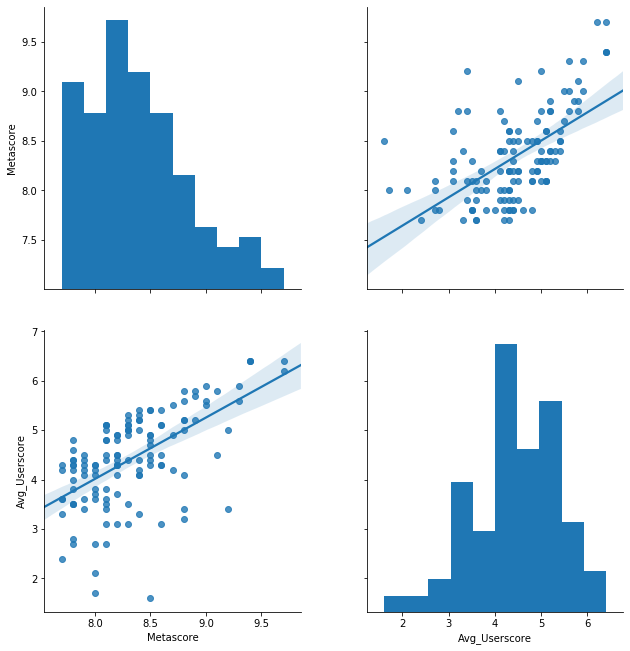

In [56]:
#Seaborn allows to make a correlogram or correlation matrix really easily. 
plot = sns.pairplot(dfDifference.drop(['Unnamed: 0', 'Title', 'Year', 'Genre', 'Platform'], axis=1), kind = 'reg')

plot.fig.set_size_inches(10,10)
plt.show()

This pairplot is similar to the scatter diagram shown before. In this diagram you can also see the highest and lowest metascore and userscores,

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
The data now contains no null values and the 'Metascore' and 'Userscore' columns are both converted to floats. The pie chart shows that most of the userscores are positive, which is to be expected as this dataset contains the top 5000 games between 1998 and 2018. Possible problems may still occur ith the size of the dataset when it comes to sentimental analysis, so may need to take a random sample of the data, or sample data for each publisher indiividualy. Another problem arises in the data itself. As these are user reviews it is always possible that there could be some 'joke reviews', as in the user reviews the game describing all its negative features, but gives the game a high sore anyway and vice versa. Also user reviews are prone to spelling mistakes and these will be picked up in the bag of words.

# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>

## 3.1 Select Your Data <a class="anchor" id="Selectyourdata"></a>

In [58]:
# Using dfDifference used in bar chart earlier.
# Contains games that have a noticable difference between their Metascore and their Avg_Userscore

# Dataframe containg all user reviews for the games in dfDifference. Will be used to determine why users dont like the games
dfCommentsDifference = dfComments.merge(dfDifference[['Platform', 'Title', 'Avg_Userscore']], on = ['Platform', 'Title'])

# Rename Avg_Userscore to Game_Avg_Userscore for clarity
dfCommentsDifference.rename(columns={'Avg_Userscore': 'Game_Avg_Userscore'}, inplace=True)

display(dfCommentsDifference)

Unnamed: 0                     Title      Platform  Userscore  \
0            5828  Tony Hawk's Pro Skater 2     Dreamcast         10   
1            5829  Tony Hawk's Pro Skater 2     Dreamcast         10   
2            5830  Tony Hawk's Pro Skater 2     Dreamcast          9   
3            5831  Tony Hawk's Pro Skater 2     Dreamcast         10   
4            5832  Tony Hawk's Pro Skater 2     Dreamcast         10   
...           ...                       ...           ...        ...   
27293      281674                  NBA 2K18  PlayStation4          0   
27294      281675                  NBA 2K18  PlayStation4          1   
27295      281676                  NBA 2K18  PlayStation4          0   
27296      281677                  NBA 2K18  PlayStation4          0   
27297      281678                  NBA 2K18  PlayStation4          0   

                                                 Comment        Username  \
0      This game is the best, I really liked it a lot...  dontsniffpaint   
1       Awesome, its hard to smoke a siggi in the gam...         PotHead   
2       I am the master of this game. Although it see...         WeeWorn   
3      the best tony hawk game in the series and the ...    redrx8gt2005   
4      Очень хорошая часть для своего времени. Хоть с...        denton13   
...                                                  ...             ...   
27293  absolutely terrible game... the producers of 2...       cpierce23   
27294  Don't get me wrong this game is horrendously b...          zabian   
27295  Micro transaction greed, terrible servers (alm...       Shade1260   
27296  The neighborhood is awful, the grind sucks and...        hoopheid   
27297  I have just created this account so I can rate...           The47   

       Game_Avg_Userscore  
0                     6.2  
1                     6.2  
2                     6.2  
3                     6.2  
4                     6.2  
...                   ...  
27293                 1.7  
27294                 1.7  
27295                 1.7  
27296                 1.7  
27297                 1.7  

[27298 rows x 7 columns]

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Not needed

### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>

In [59]:
dfCommentsDifference = dfCommentsDifference.drop("Unnamed: 0", 1)

display(dfCommentsDifference.head(5))

Title   Platform  Userscore  \
0  Tony Hawk's Pro Skater 2  Dreamcast         10   
1  Tony Hawk's Pro Skater 2  Dreamcast         10   
2  Tony Hawk's Pro Skater 2  Dreamcast          9   
3  Tony Hawk's Pro Skater 2  Dreamcast         10   
4  Tony Hawk's Pro Skater 2  Dreamcast         10   

                                             Comment        Username  \
0  This game is the best, I really liked it a lot...  dontsniffpaint   
1   Awesome, its hard to smoke a siggi in the gam...         PotHead   
2   I am the master of this game. Although it see...         WeeWorn   
3  the best tony hawk game in the series and the ...    redrx8gt2005   
4  Очень хорошая часть для своего времени. Хоть с...        denton13   

   Game_Avg_Userscore  
0                 6.2  
1                 6.2  
2                 6.2  
3                 6.2  
4                 6.2

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Done before when dealing with outliers

### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>
Not needed

### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>
Not needed

## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
No new data required

## 3.4 Integrate Data  <a class="anchor" id="Integratedata"></a>
Done before when selecting data

## 3.5 Primary Data Set  <a class="anchor" id="Primary Data Set"></a>

In [62]:
# dataset containing reviews whose score is less than the games average score
dfCommentsNegative = dfCommentsDifference[dfCommentsDifference['Userscore'] <= dfCommentsDifference['Game_Avg_Userscore']]

display(dfCommentsNegative)

Title      Platform  Userscore  \
5            Tony Hawk's Pro Skater 2     Dreamcast          0   
6            Tony Hawk's Pro Skater 2     Dreamcast          0   
28     Call of Duty: Modern Warfare 2  PlayStation3          5   
30     Call of Duty: Modern Warfare 2  PlayStation3          6   
31     Call of Duty: Modern Warfare 2  PlayStation3          0   
...                               ...           ...        ...   
27293                        NBA 2K18  PlayStation4          0   
27294                        NBA 2K18  PlayStation4          1   
27295                        NBA 2K18  PlayStation4          0   
27296                        NBA 2K18  PlayStation4          0   
27297                        NBA 2K18  PlayStation4          0   

                                                 Comment         Username  \
5      Upon release, this was an awesome game with an...  thelikeablehero   
6      Tony Hawk games are very overrated.  The games...     Chameleon187   
28     If this game came out and no other games exist...         ashydock   
30      Gameplay is superb. The single player campaig...         TristanL   
31     Trickshotters ruin this game, little kids spin...           Xaghow   
...                                                  ...              ...   
27293  absolutely terrible game... the producers of 2...        cpierce23   
27294  Don't get me wrong this game is horrendously b...           zabian   
27295  Micro transaction greed, terrible servers (alm...        Shade1260   
27296  The neighborhood is awful, the grind sucks and...         hoopheid   
27297  I have just created this account so I can rate...            The47   

       Game_Avg_Userscore  
5                     6.2  
6                     6.2  
28                    6.4  
30                    6.4  
31                    6.4  
...                   ...  
27293                 1.7  
27294                 1.7  
27295                 1.7  
27296                 1.7  
27297                 1.7  

[15189 rows x 6 columns]

# 4. Modelling <a class="anchor" id="Modelling"></a>

## 4.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>

Import Models below:

In [63]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from statistics import mode
from nltk.tokenize import word_tokenize
import re
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## 4.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

- No missing values
- Must be strings or words


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>

First, I will use nltk to create a bag of words containing nouns from each review in dfCommentsNegative

In [64]:
# code from Sentiment analysis tutorial

all_words = []
documents = []

from nltk.corpus import stopwords
import re

# words to ignore
stop_words = list(set(stopwords.words('english')))

# retrieve all nouns
allowed_word_types = ["N"]

for p in dfCommentsNegative["Comment"]:
    # create a list of tuples where the first element of each tuple is a review
    # the second element is the label
    documents.append( (p, "neg") )
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', str(p))
    
    # tokenize 
    tokenized = word_tokenize(cleaned)
    
    # remove stopwords 
    stopped = [w for w in tokenized if not w in stop_words]
    
    # parts of speech tagging for each word 
    neg = nltk.pos_tag(stopped)
    
    # make a list of  all nouns identified by the allowed word types list above
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())

A bag of words was just created above from all the nouns from comments in the dfCommentsNegative dataset and have the tag 'neg' attatched to them. This took about 5 - 10 to accomplish so there may be a more efficiant way to do this.

Next, I will retrieve the 50 most common words in this list

In [66]:
from collections import Counter
words_to_count = (word for word in all_words)
c = Counter(words_to_count)
mostCommon = c.most_common(50)
print("Most common words:\n")

for word in mostCommon:
    print(word)

Most common words:

('game', 51422)
('games', 8128)
('story', 5926)
('time', 5459)
('money', 4839)
('people', 4818)
('play', 4701)
('mw', 4566)
('diablo', 4348)
('player', 4274)
('way', 3633)
('cod', 3613)
('graphics', 3604)
('im', 3586)
('nothing', 3446)
('series', 3311)
('players', 3171)
('gameplay', 3070)
('multiplayer', 3061)
('blizzard', 3051)
('year', 3002)
('bioware', 2863)
('years', 2850)
('hours', 2746)
('effect', 2720)
('thing', 2548)
('mass', 2516)
('something', 2308)
('dont', 2263)
('me', 2241)
('ea', 2211)
('fun', 2163)
('campaign', 2141)
('system', 2135)
('duty', 2126)
('characters', 2120)
('everything', 2106)
('character', 2067)
('call', 2038)
('ive', 1995)
('things', 1971)
('fifa', 1971)
('review', 1961)
('maps', 1886)
('warfare', 1815)
('age', 1718)
('dlc', 1714)
('anything', 1705)
('thats', 1690)
('servers', 1650)


Above is the 50 most common words from the bag of words. Some notable examples are 'fifa', 'blizzard', 'bioware', 'cod' and 'ea'. These are all related to companies with a bad reputation. cod (Call of Duty), mw(Modern Warfare) and blizzard are related to Activision and fifa, bioware and ea all relate to EA.

Next, I will use Vader sentimant analysis do determine what the most negative reviews are. To do this, I will get the polarity score for each review and and reviews to a list if their polarity score has a higher negative value than positive.

In [67]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

reviews = dfCommentsNegative["Comment"]

negativeReviews = []

sid = SentimentIntensityAnalyzer()
for review in reviews:
    ss = sid.polarity_scores(review + "\n")
    for k in sorted(ss):
        if(k == "neg"):
            highest = ss[k]
        
        elif(k == "pos"):
            if(ss[k] < highest):
                negativeReviews.append((review, highest))
        
for review in negativeReviews:
    print("Review:" + "\n" + review[0] + "\nNegative Polarity Score: " + str(review[1]) + "\n")

Review:
 Gameplay is superb. The single player campaign is decent enough (though a little out there). However this game completely comes crashing down with its online gameplay. VERY unbalanced. There are either very good players, or very poor. There is no in between. The streaks system that they implemented this time is ABSOLUTE OVERKILL. And the servers/matchmaking for this game are the worst Gameplay is superb. The single player campaign is decent enough (though a little out there). However this game completely comes crashing down with its online gameplay. VERY unbalanced. There are either very good players, or very poor. There is no in between. The streaks system that they implemented this time is ABSOLUTE OVERKILL. And the servers/matchmaking for this game are the worst that i have ever attempted to play with on XBL.
Negative Polarity Score: 0.124

Review:
Trickshotters ruin this game, little kids spinning around yelling in their microphones.The game is ruined!Really not fun at all


Review:
As someone who really enjoyed the other games in the series, this is a huge let down. From the dumbed down story, terrible animation and graphic issues, and the gaping plot holes this game is just BAD. Truly disappointing. What a joke.
Negative Polarity Score: 0.231

Review:
I wouldn't have imagined that they would have went off the deep end when finishing the story. An insult to the players who played the first game. Bioweare needs to understand that it should have had it's intended story completely written before starting to work on this series. The endings make no sense, and they will only continue your adventure if you pony up for dlc, which probably won'tI wouldn't have imagined that they would have went off the deep end when finishing the story. An insult to the players who played the first game. Bioweare needs to understand that it should have had it's intended story completely written before starting to work on this series. The endings make no sense, and they will only


Review:
0...There is nothing else you can give this travesty and attempt from EA to leech money out of their fans not thinking about the consequences. BioWare did everything wrong here: from unimportant and speedy sidequests to a toilet flush ending where NONE of the choices you made mattered(Please don't give us the crap about The Director's Cut DLC...BARELY made an impact and a little to late)0...There is nothing else you can give this travesty and attempt from EA to leech money out of their fans not thinking about the consequences. BioWare did everything wrong here: from unimportant and speedy sidequests to a toilet flush ending where NONE of the choices you made mattered(Please don't give us the crap about The Director's Cut DLC...BARELY made an impact and a little to late) Everything good that ME and ME2 managed to do with our Shepared experience was beaten to pulp and into submission by this horrendous closing to the Trilogy leaving me (and apparently half of the ppl that played

Review:
I really used to enjoy the call of duty games, but unfortunately this one isn't  any different from the previous ones.  I purchased the game on the morning of the release and as I went online I noticed most of the players were at level 30 or higher.  Some in fact at level 60!  WHAT IS GOING ON, HOW DOES THIS HAPPEN 10 HOURS FROM THE RELEASE!  This is really annoying.  Also this has theI really used to enjoy the call of duty games, but unfortunately this one isn't  any different from the previous ones.  I purchased the game on the morning of the release and as I went online I noticed most of the players were at level 30 or higher.  Some in fact at level 60!  WHAT IS GOING ON, HOW DOES THIS HAPPEN 10 HOURS FROM THE RELEASE!  This is really annoying.  Also this has the same gameplay and even thou I did pretty well online I feel disappointed all and all.
Negative Polarity Score: 0.108

Review:
I'm mainly giving this bad review to piss off the elitist professional reviewers that are


Review:
the game isnt very good, its the same game with worse maps. the guns are crap too haha sledgehammer games should learn how to make good maps... i cant stand any of the maps on the game. and they have support class now which allows you to get killstreaks with out streaking, u can die and still rack up kills and get rewarded, makes no sense in my opinion. also the stupid developers are onthe game isnt very good, its the same game with worse maps. the guns are crap too haha sledgehammer games should learn how to make good maps... i cant stand any of the maps on the game. and they have support class now which allows you to get killstreaks with out streaking, u can die and still rack up kills and get rewarded, makes no sense in my opinion. also the stupid developers are on twitter beggin people to give it a higher score on here so wtf im not gonna rate it high because yur beggin on twitter. crap game, maybe next year they will give us better graphics and better maps.
Negative Polar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




Review:
1. Rogue Archer is useless. The NPC dude is much better and it's almost impossible to run from mobs with two rogues and one mage. I had to cheese every single engagement. I hope you get a warrior if you keep playing because ****The worst thing: The difficulty on insane is not from tactical depth. All you need is luck and button-mashing (and running around in circles, if your party1. Rogue Archer is useless. The NPC dude is much better and it's almost impossible to run from mobs with two rogues and one mage. I had to cheese every single engagement. I hope you get a warrior if you keep playing because ****The worst thing: The difficulty on insane is not from tactical depth. All you need is luck and button-mashing (and running around in circles, if your party sucks).At least I can spec the Dwarf to be melee if I want my character to be ranged.Oh wait I can't. That's right, **** your RPG-ism. You play like we want.2. The gameplay has nothing to do with tactical RPG. Your only real

Review:
If you have played cod black ops 1and 2, you get the gist right now, with the same multiplayer, same modes and maps. The single player campaign is so confusing, I just cannot give a **** about what is happening. Plus they have already stolen two ideas from two different franchises, but i will leave it to you to find that out.
Negative Polarity Score: 0.083

Review:
I cannot believe it. I cannot **** believe it. They actually made new weapons, and put them, guess where, in supply drops. The drop rates for these weapons are .8 percent. That's ridiculous. They say its not gambling, because you can earn keys to get the drops in game, and drops usually give you a camo, but the keys take forever to get and the camos are **** 99 percent of the time. No, ImI cannot believe it. I cannot **** believe it. They actually made new weapons, and put them, guess where, in supply drops. The drop rates for these weapons are .8 percent. That's ridiculous. They say its not gambling, because you can

Above is a list of reviews obtained by using the Vader method of sentiment analysis. Vader sentiment analysis analyzes a string and returns a positive, neurtral, negative, and compound value. For the purpose of this project I am only interested in reviews with a polarity score where the negative is higher than the positive

In [36]:
def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search 

frequencies = []

for word, count in mostCommon:
    appearenceCount = 0;
    for review, score in negativeReviews:
        if(findWholeWord(word)(review)):
            appearenceCount += 1
    frequencies.append((word, appearenceCount))

Finally, I created a list containing the number of times each word appeared in the list of negative reviews that was retrieved using Vader sentiment analysis

## 6. Results/Data/Findings <a class="anchor" id="Results"></a>

<function matplotlib.pyplot.show(*args, **kw)>

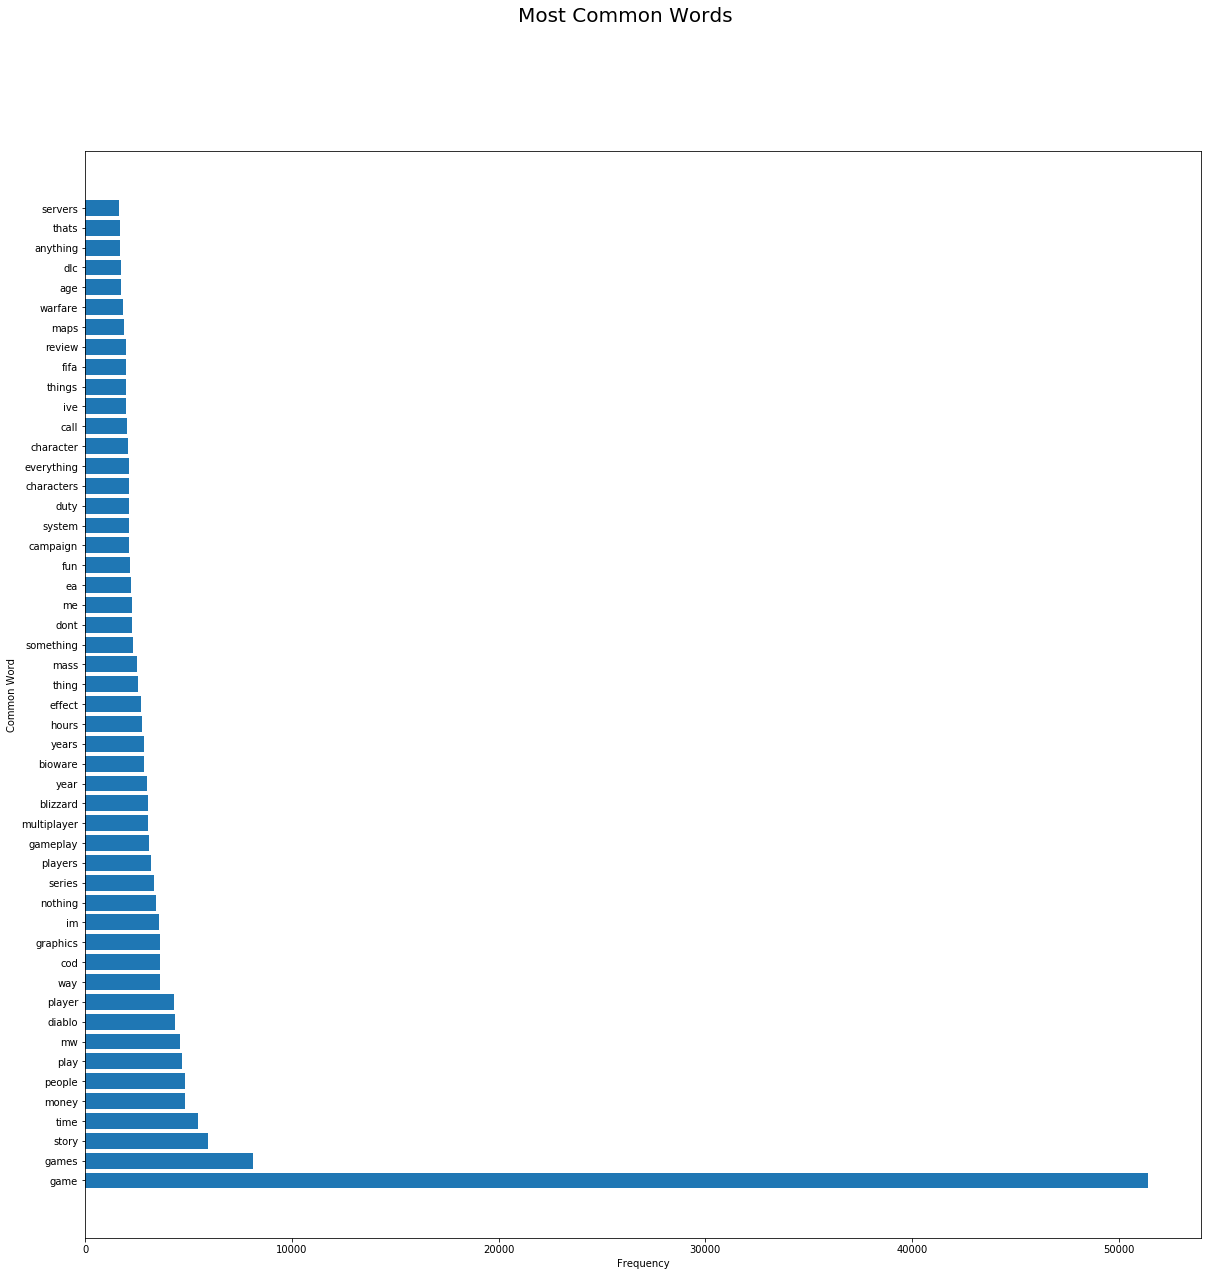

In [37]:
# Variable used for bar chart
labels = []
values = []
for word, count in mostCommon:
    labels.append(word)
    values.append(count)
    
# Increase size of bar chart for easier viewing
fig = plt.gcf()
fig.set_size_inches(20,20)
fig.suptitle("Most Common Words", fontsize = 20)

# Create bar chart with pre-defined variables
plt.barh(labels, values)
plt.xlabel("Frequency")
plt.ylabel("Common Word")

# Show bar chart
plt.show

The graph above the frequency of the most common words in negative reviews.

<function matplotlib.pyplot.show(*args, **kw)>

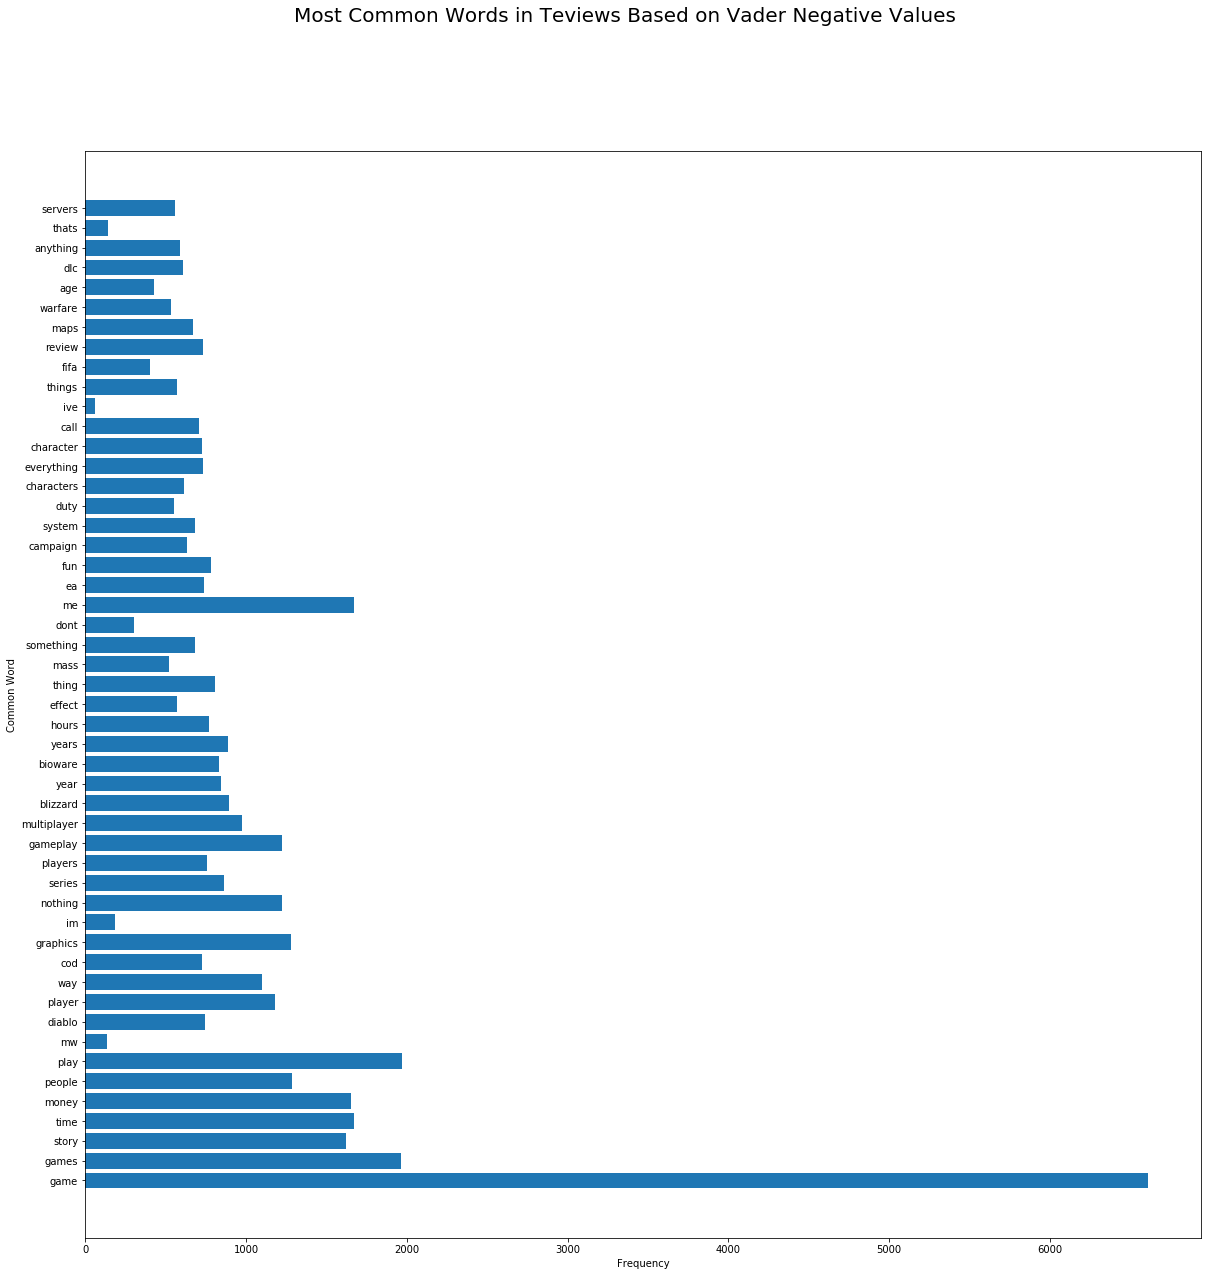

In [38]:
# Variables used for bar chart
labels = []
values = []
for word, count in frequencies:
    labels.append(word)
    values.append(count)

# Increase size of bar chart for easier viewing
fig = plt.gcf()
fig.set_size_inches(20,20)
fig.suptitle("Frequency of Most Common Words in Reviews With Vader Negative Values", fontsize = 20)

# Create bar chart with pre-defined variables
plt.barh(labels, values)
plt.xlabel("Frequency")
plt.ylabel("Common Word")

# Show bar chart
plt.show

The graph above the frequency of the most common words in reviews that Vader deemed negative using sentimental analysis.

The data retrieved has some useful information but also contains pointless data like how 'game' is the most common word.
The model didn't achieve eactly what i was hoping, but it still confirmed some assumptions.

# 6. Discussion <a class="anchor" id="Discussion"></a>	

Discussion
- This is probably the longest writing section. 
- It brings everything together, showing how your findings respond to the brief you explained in your introduction and the previous research you surveyed in your literature review. 
- This is the place to mention if there were any problems (e.g. your results were different from expectations, you couldn’t find important data, or you had to change your method or participants) and how they were, or could have been, solved.
- Interpret the models according to your domain knowledge, your data mining success criteria and your desired test design. 
- Judge the success of the application of modelling and discovery techniques technically, then in the business context. 

The findings i retrieved from my model doesn't necessarily prove that there is any bias towards game publishers, developers or game series. The only thing that could justify this is the fact that words like 'ea', 'cod' are in the to 50 most common words in negative reviews and are prominent in the negetive reviews retrieved using Vader. One of the things i expected to be a part of the most common words list was microtransactions, however this may be due to the fact that these only really became prevalent around 2010 when mobile games started implementing them and companies like EA tried implementing them into their games. While microtransaction may not be in the common word list, dlc is (downloadable content) which are microtransactions but generally come with more content than a microtansaction. Money is also one of the words in the list which could tie together with DLC to prove users dislike games with egregious dlc / microtransactions such as cod, fifa and diablo, which also appear in the common words list. However, there is also the possiblity that money was not used to reference dlc at all, but instead was used in a way to discourage others to buy the game i.e. 'don't waste your money on this game'.

Overall the findings can suggest a paticular bias towards certain games ('Call of Duty') and publishers('EA'), but there is nothing here that can say for certain whether thats the case. The fact that the most common word was generally meaningless, 'game', shows that this is not the best approach to determining whether there is a bias or not. There was also alot of other useless words in there such as 'thats', 'dont', 'ive' etc. One final reason this was not a very succesful model is the data itself. Being that the data was composed of user reviews, it was full of spelling errors. This leads to the possibility that the words i was looking for, 'loot-box', 'microtransaction' and publisher names were actually quite common, but where misspelled or spelled diferently, i.e. microtransaction could have been spelled as micro-transaction or micro transaction which would have counted as two seperate words.

These factors ultimately lead to the conclusion that either more work had to be done to prepare the data to find the most common words, or a different approach entirely had to be taken. I also didn't account for positive bias in this study which would allow for more of a comparison to be made.

# 7. Conclusion <a class="anchor" id="Conclusion"></a>

In summary, due to the factors outlined in the previous section, no real conclusive data was found, but it did add some validity to the assumptions made.

For future research it would be ideal to tain a sentiment analyzer before hand using positive and negative reviews, and to use a dataset containing reviews with less spelling mistakes.

# 8. Reference List/Bibliography <a class="anchor" id="Reference"></a>

Datasets: From Kaggle: https://www.kaggle.com/dahlia25/metacritic-video-game-comments Author: Dahlia

Metacritic Matters: How Review Scores Hurt Video Games: https://kotaku.com/metacritic-matters-how-review-scores-hurt-video-games-472462218 Author: Jason Schreier Published: 08/08/2015

On the Validity of Metacritic in Assessing Game Value: https://www.eludamos.org/index.php/eludamos/article/viewArticle/vol7no1-6/7-1-6-html Authors: Adams Greenwood-Ericksen, Scott R. Poorman, Roy Papp

Sentiment analysis tutorial: https://towardsdatascience.com/basic-binary-sentiment-analysis-using-nltk-c94ba17ae386 Author: Samira Munir